In [1]:
import ehtim as eh

Welcome to eht-imaging! v 1.2.4 



In [2]:
# Load in example image and array
im = eh.image.load_txt('../models/avery_sgra_eofn.txt')
eht = eh.array.load_txt('../arrays/EHT2017.txt')

Loading text image:  ../models/avery_sgra_eofn.txt


In [3]:
# create example observation uvfits file
tint_sec = 5
tadv_sec = 600
tstart_hr = 0
tstop_hr = 24
bw_hz = 4e9
obs = im.observe(eht, tint_sec, tadv_sec, tstart_hr, tstop_hr, bw_hz,
                 sgrscat=False, ampcal=True, phasecal=False)
obs.save_uvfits('../../example_survey_obs.uvfits')

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 
   Applying atmospheric phase corruption: phasecal-->False
Adding thermal noise to data . . . 
Building NX table


In [4]:
# create a mock SEFD error budget for this array
sites = list(obs.tkey.keys())
SEFD_errs = {}
for site in sites:
    SEFD_errs[site] = 0.1

print(SEFD_errs)

{'ALMA': 0.1, 'LMT': 0.1, 'PV': 0.1, 'APEX': 0.1, 'SMA': 0.1, 'SMT': 0.1, 'SPT': 0.1, 'JCMT': 0.1}


In [5]:
# create a dict of non-varying imaging parameters, such as filenames
# see a full list of fixed parameters in the docs
params_fixed = eh.survey.create_params_fixed(infile='../../example_survey_obs.uvfits',
                                            outfile_base='example_survey',
                                             outpath='../../example_survey_output/',
                                             nproc=-1, # use all available cores, can be changed
                                             SEFD_error_budget= SEFD_errs)

print(params_fixed)

{'infile': '../../example_survey_obs.uvfits', 'outfile_base': 'example_survey', 'outpath': '../../example_survey_output/', 'ground_truth_img': 'None', 'save_imgsums': False, 'save_uvfits': True, 'save_pdf': False, 'save_stats': True, 'save_caltab': True, 'nproc': -1, 'backend': 'multiprocessing', 'ttype': 'nfft', 'selfcal': True, 'gaintol': [0.02, 0.2], 'niter_static': 3, 'blurfrac': 1, 'maxit': 100, 'stop': 0.0001, 'fov': 128, 'npixels': 64, 'reverse_taper_uas': 5, 'uv_zblcut': 100000000.0, 'SEFD_error_budget': {'ALMA': 0.1, 'LMT': 0.1, 'PV': 0.1, 'APEX': 0.1, 'SMA': 0.1, 'SMT': 0.1, 'SPT': 0.1, 'JCMT': 0.1}}


In [6]:
# create a DataFrame of parameters to be surveyed over
psets = eh.survey.create_survey_psets(zbl=[0.6,0.7], sys_noise=[0,0.01], prior_fwhm=[50])
display(psets)

,zbl,sys_noise,avg_time,prior_fwhm,sc_phase,xdw_phase,sc_ap,xdw_ap,amp,cphase,logcamp,simple,l1,tv,tv2,flux,epsilon_tv,i
0,0.6,0.00,scan,50,2,10,2,1,0.2,1,1,1,1,1,1,1,1.000000e-10,0
1,0.6,0.01,scan,50,2,10,2,1,0.2,1,1,1,1,1,1,1,1.000000e-10,1
2,0.7,0.00,scan,50,2,10,2,1,0.2,1,1,1,1,1,1,1,1.000000e-10,2
3,0.7,0.01,scan,50,2,10,2,1,0.2,1,1,1,1,1,1,1,1.000000e-10,3


In [7]:
# to run only a single pset, create an instance of the ParameterSet class and use the function run()
pset = dict(psets.iloc[0])

ps = eh.survey.ParameterSet(pset, params_fixed)
ps.run()

Loading uvfits:  ../../example_survey_obs.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.154204 s
J: 94.114963
chi2_amp : 188.97 chi2_cphase : 33.02 chi2_logcamp : 11.21 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 0.995153 s
J: 88.245787
chi2_amp : 205.92 chi2_cphase : 24.06 chi2_logcamp : 11.28 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.081771 s
J: 85.356193
chi2_amp : 214.72 chi2_cphase : 21.03 chi2_logcamp : 9.55 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to ca

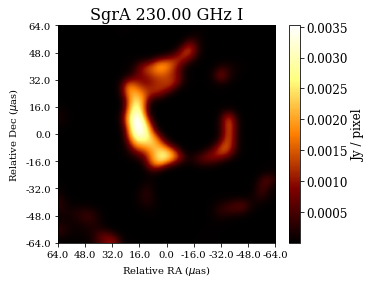

In [9]:
# display output image
# won't necessarily be good as the default selection of hyperparameters is not optimized for anything
ps.im_out.display();

In [10]:
# to run all parameter sets, use the run_survey function

# Note that for each parameter set, the ParameterSet objects checks for the existence of files corresponding to each
# pset id - if they already exist, that pset will not be run again

eh.survey.run_survey(psets, params_fixed)

initializing paramsurvey multiprocessing backend
initializing multiprocessing pool with 7 processes
paramsurvey.map start time 20221111-220923
paramsurvey.map pset count 4, pset columns ['zbl', 'sys_noise', 'avg_time', 'prior_fwhm', 'sc_phase', 'xdw_phase', 'sc_ap', 'xdw_ap', 'amp', 'cphase', 'logcamp', 'simple', 'l1', 'tv', 'tv2', 'flux', 'epsilon_tv', 'i']


Welcome to eht-imaging! v 1.2.4 

Loading uvfits:  ../../example_survey_obs.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 2.310626 s
J: 68.566834
chi2_amp : 134.60 chi2_cphase : 23.28 chi2_logcamp : 8.02 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 2.489936 s
J: 48.000523
chi2_amp : 131.21 chi2_cphase : 5.56 chi2_logcamp : 5.86 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 2.137943 s
J: 40.991075
chi2_amp : 111.30 chi2_cphase : 3.04 chi2_logcamp : 5.38 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified

counter default_iowait, total 0s, mean 0.00s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 0s, mean 0.00s, counts 1
counter default_wallclock, 50%tile: 0.01s
counter default_wallclock, 90%tile: 0.01s
counter default_wallclock, 95%tile: 0.01s
counter default_wallclock, 99%tile: 0.01s


Scan 037/107 : [----------                    ]34%
self_cal time: 12.760962 s
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 3.789367 s
J: 355.643224
chi2_amp : 132.30 chi2_cphase : 3.34 chi2_logcamp : 5.30 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.597129 s
J: 352.868992
chi2_amp : 132.83 chi2_cphase : 3.18 chi2_logcamp : 5.21 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 2.255896 s
J: 353.312383
chi2_amp : 133.07 chi2_cphase : 3.22 chi2_logcamp : 5.16 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities w

counter default_iowait, total 0s, mean 0.00s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 0s, mean 0.00s, counts 1
counter default_wallclock, 50%tile: 0.01s
counter default_wallclock, 90%tile: 0.01s
counter default_wallclock, 95%tile: 0.01s
counter default_wallclock, 99%tile: 0.01s


Scan 042/107 : [-----------                   ]39%
self_cal time: 13.209627 s
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.203023 s
J: 355.195186
chi2_amp : 133.70 chi2_cphase : 3.15 chi2_logcamp : 5.16 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.214173 s
J: 354.534153
chi2_amp : 134.00 chi2_cphase : 3.20 chi2_logcamp : 5.13 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.241017 s
J: 355.587652
chi2_amp : 134.32 chi2_cphase : 3.13 chi2_logcamp : 5.10 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities w

counter default_iowait, total 0s, mean 0.00s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 0s, mean 0.00s, counts 1
counter default_wallclock, 50%tile: 0.01s
counter default_wallclock, 90%tile: 0.01s
counter default_wallclock, 95%tile: 0.01s
counter default_wallclock, 99%tile: 0.01s


Scan 065/107 : [------------------            ]60%
self_cal time: 28.886013 s
Warning! Specified flux is < 80% of maximum visibility amplitude!
Initializing imager data products . . .
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Imager run 1 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.289839 s
J: 84.745531
chi2_amp : 9.58 chi2_cphase : 2.34 chi2_logcamp : 4.42 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 2 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.242442 s
J: 83.434856
chi2_amp : 8.94 chi2_cphase : 2.23 chi2_logcamp : 4.43 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
Imager run 3 
Warning! Specified flux is < 80% of maximum visibility amplitude!
time: 1.252480 s
J: 82.289057
chi2_amp : 8.67 chi2_cphase : 2.18 chi2_logcamp : 4.41 
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with nfft 

counter default_iowait, total 0s, mean 0.00s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 0s, mean 0.00s, counts 1
counter default_wallclock, 50%tile: 0.01s
counter default_wallclock, 90%tile: 0.01s
counter default_wallclock, 95%tile: 0.01s
counter default_wallclock, 99%tile: 0.01s


Scan 106/107 : [----------------------------- ]99%
self_cal time: 29.032081 s
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
Updated self.amp: no averaging
Updated self.amp: avg_time 0.000000 s

Adding a 1.5510938413375686 Jy circular Gaussian of FWHM size 1303.9269657417408 uas
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with nfft Fourier Transform...
Producing clean visibilities from image with nfft FT . . . 
Not Using Multiprocessing
Scan 008/107 : [--                            ]7%
self_cal time: 17.003264 s
Building NX table
No NX table in saved uvfits
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with nfft Fourier Transform...
Producing clean visibilities from image with nfft FT . . . 
Not Using Multiprocessing
Scan 012/107 : [---                           ]11%
self_ca

counter default_iowait, total 0s, mean 0.00s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 0s, mean 0.00s, counts 1
counter default_wallclock, 50%tile: 0.01s
counter default_wallclock, 90%tile: 0.01s
counter default_wallclock, 95%tile: 0.01s
counter default_wallclock, 99%tile: 0.01s


Scan 106/107 : [----------------------------- ]99%
self_cal time: 20.004488 s
Building NX table
No NX table in saved uvfits
U-V flagged 125/1030 visibilities
U-V flagged 905/1030 visibilities
No stations specified in self cal: defaulting to calibrating all stations!
Computing the Model Visibilities with nfft Fourier Transform...
Producing clean visibilities from image with nfft FT . . . 
Not Using Multiprocessing
Scan 105/107 : [----------------------------- ]98%

counter default_iowait, total -129s, mean -43.03s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 312s, mean 104.10s, counts 3
counter default_wallclock, 50%tile: 156.67s
counter default_wallclock, 90%tile: 156.67s


Scan 106/107 : [----------------------------- ]99%

counter default_wallclock, 95%tile: 156.67s
counter default_wallclock, 99%tile: 156.67s
default progress: total: 4, active: 0, finished: 4, failures: 0, exceptions: 0
counter default_iowait, total -219s, mean -54.79s, counts 1
counter default_iowait, 50%tile: 0.01s
counter default_iowait, 90%tile: 0.01s
counter default_iowait, 95%tile: 0.01s
counter default_iowait, 99%tile: 0.01s
counter default_wallclock, total 492s, mean 123.03s, counts 4
counter default_wallclock, 50%tile: 156.67s
counter default_wallclock, 90%tile: 180.22s
counter default_wallclock, 95%tile: 180.22s
counter default_wallclock, 99%tile: 180.22s
/Users/nitikayadlapalli/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas_appender/appender.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(self._small, **self._append_kwargs)
paramsurvey.map end time 20221111-221226
paramsurvey.map returning results
